In [44]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv("data/mouse_drug_data.csv")
trial_df = pd.read_csv("data/clinicaltrial_data.csv")
#mouse_df.head()
#trial_df.head()

# Combine the data into a single dataset
trialdata_df = pd.merge(mouse_df, trial_df, on="Mouse ID")
trialdata_df.head(3)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
trial_groupby_drug = trialdata_df.groupby(["Drug", "Timepoint"])
tumor_df1 = pd.DataFrame(trial_groupby_drug["Tumor Volume (mm3)"].mean())
tumor_df1.reset_index(inplace=True)
tumor_df1.head(2)

# Minor Data Munging to Re-Format the Data Frames
tumor_df1S = tumor_df1.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
tumor_df1S.head(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818


In [3]:
# Store the Standard Error Tumor Volume Data Grouped by Drug and Timepoint
tumor_df2 = pd.DataFrame(trial_groupby_drug["Tumor Volume (mm3)"].sem())
tumor_df2 = tumor_df2.rename(columns={"Tumor Volume (mm3)":"sem"})
tumor_df2.reset_index(inplace=True)
tumor_df2.head(10)

# Minor Data Munging to Re-Format the Data Frames
tumor_df2S = tumor_df2.pivot(index='Timepoint',columns='Drug',values='sem')
tumor_df2S.head(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.18895


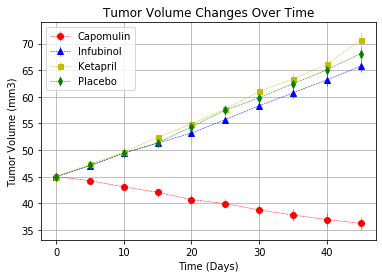

<Figure size 432x288 with 0 Axes>

In [11]:
plt.errorbar(tumor_df1S.index, tumor_df1S["Capomulin"], yerr=tumor_df2S["Capomulin"],color = 'r', marker = 'o', linestyle='dashed', label='Capomulin', linewidth=.50)
plt.errorbar(tumor_df1S.index, tumor_df1S["Infubinol"], yerr=tumor_df2S["Infubinol"], color = 'b', marker = '^', linestyle='dashed', label='Infubinol', linewidth=.5)
plt.errorbar(tumor_df1S.index, tumor_df1S["Ketapril"], yerr=tumor_df2S["Ketapril"], color='y', marker='s', markersize=5, linestyle='dashed', label='Ketapril', linewidth=.5)
plt.errorbar(tumor_df1S.index, tumor_df1S["Placebo"], yerr=tumor_df2S["Placebo"], color='g', marker='d', markersize=5, linestyle='dashed', label='Placebo', linewidth=.5)

plt.title("Tumor Volume Changes Over Time")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend()

plt.show()
plt.savefig("Mandell_Tumor_Response_to_Treatment")

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
trial_groupby_meta = trialdata_df.groupby(["Drug", "Timepoint"])

meta_df1 = pd.DataFrame(trial_groupby_meta["Metastatic Sites"].mean())
meta_df1.reset_index(inplace=True)
meta_df1.head(5)

# Minor Data Munging to Re-Format the Data Frames
meta_df1S = meta_df1.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
meta_df1S.head(3)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000
5,0.16,0.380952,0.280000,0.304348,0.26087,0.375000,0.320000,0.12,0.240000,0.166667
10,0.32,0.600000,0.666667,0.590909,0.52381,0.833333,0.565217,0.25,0.478261,0.500000


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_df2 = pd.DataFrame(trial_groupby_meta["Metastatic Sites"].sem())
meta_df2.reset_index(inplace=True)
meta_df2.head(3)

# Minor Data Munging to Re-Format the Data Frames
meta_df2S = meta_df2.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
meta_df2S.head(3)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109


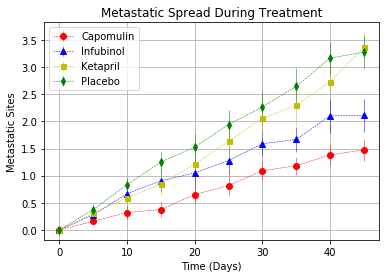

In [14]:
# Generate the Plot (with Error Bars)
plt.errorbar(meta_df1S.index, meta_df1S["Capomulin"], yerr=meta_df2S["Capomulin"],color = 'r', marker = 'o', linestyle='dashed', label='Capomulin', linewidth=.50)
plt.errorbar(meta_df1S.index, meta_df1S["Infubinol"], yerr=meta_df2S["Infubinol"], color = 'b', marker = '^', linestyle='dashed', label='Infubinol', linewidth=.5)
plt.errorbar(meta_df1S.index, meta_df1S["Ketapril"], yerr=meta_df2S["Ketapril"], color='y', marker='s', markersize=5, linestyle='dashed', label='Ketapril', linewidth=.5)
plt.errorbar(meta_df1S.index, meta_df1S["Placebo"], yerr=meta_df2S["Placebo"], color='g', marker='d', markersize=5, linestyle='dashed', label='Placebo', linewidth=.5)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.grid()
plt.legend()

# Save the Figure
plt.savefig("Mandell_Metastatic_Response_to_Treatment")

# Show the Figure
plt.show()

## Survival Rates

In [20]:
# Store the Count of Mice Grouped by Drug and Timepoint
survival_count = trialdata_df.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]
#survival_count.head()

# Convert to DataFrame
mice_df1 = pd.DataFrame({"Mouse Count": survival_count})
mice_df1.head(3)

# Minor Data Munging to Re-Format the Data Frames
mice_df1 = mice_df1.reset_index()
survival_count_pivot = mice_df1.pivot(index='Timepoint',columns='Drug')['Mouse Count']
survival_count_pivot.head(3)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22


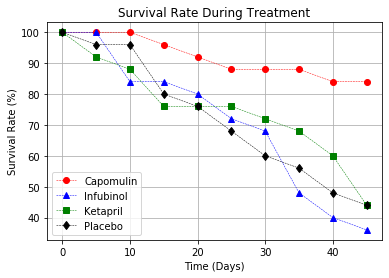

In [22]:
# Generate the Plot (Accounting for percentages)
numMice = 25
plt.plot(survival_count_pivot["Capomulin"] / numMice*100, "ro", linestyle='dashed', linewidth=.50, label='Capomulin')
plt.plot(survival_count_pivot["Infubinol"] / numMice*100, "b^", linestyle='dashed', linewidth=.5,label='Infubinol')
plt.plot(survival_count_pivot["Ketapril"] / numMice*100, "gs", linestyle='dashed', linewidth=.5, label='Ketapril')
plt.plot(survival_count_pivot["Placebo"] / numMice*100, "kd", linestyle='dashed', linewidth=.5, label='Placebo')

plt.title("Survival Rate During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.legend()

# Save the Figure
plt.savefig("Mandell_Survival_Rate_During_Treatment")

# Show the Figure
plt.show()

## Summary Bar Graph

In [26]:
# Calculate the percent changes for each drug
#take the tumor volumes at the end of the experiment and subtract the volumes at the beginning of the experiment/first value
tumor_pct_change = 100*(tumor_df1S.iloc[-1] - tumor_df1S.iloc[0]) / tumor_df1S.iloc[0]
#tumor_pct_change_sem = 100*(tumor_df2S.iloc[-1] - tumor_df2S.iloc[0]) / tumor_df2S.iloc[0]


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [24]:
# Store all Relevant Percent Changes into a Tuple
pct_changes=(tumor_pct_change["Capomulin"],
            tumor_pct_change["Infubinol"],
            tumor_pct_change["Ketapril"],
            tumor_pct_change["Placebo"])

pct_changes

(-19.475302667894173, 46.12347172785188, 57.028794686606076, 51.29796048315153)

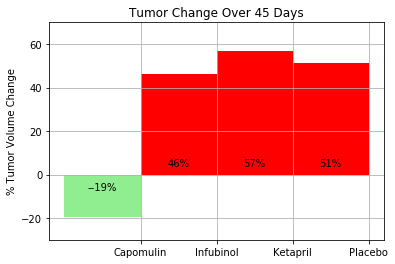

In [43]:
# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind=np.arange(len(pct_changes))
width=1

rectsPass = ax.bar(ind[0], pct_changes[0], width, color = 'lightgreen')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color = 'red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Days")
ax.set_xticks(ind+0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol','Ketapril','Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30, 70])
ax.grid()


# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
               '%d%%' % int(height),
               ha='center', va='bottom')

        
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
               '-%d%%' % int(height),
               ha='center', va='bottom')
        
# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
plt.savefig("Mandell_Summary_Bar_Graph")

# Show the Figure
fig.show()